In [1]:
import ruamel.yaml as yaml
from collections import namedtuple

In [3]:
with open('./config/config.yaml') as file:
    fruits_list = yaml.load(file)

/home/isaac_cheongjs/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:4: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  after removing the cwd from sys.path.


In [4]:
fruits_list

{'exp_dir': 'test',
 'seed': 42,
 'dry_run': False,
 'batch_size': 10,
 'test_batch_size': 100,
 'epochs': 10,
 'lr': 0.001,
 'log_interval': 100}

In [21]:
args = namedtuple("configs", fruits_list.keys())(*fruits_list.values())


In [19]:
args

configs(exp_dir='test', seed=42, dry_run=False, batch_size=10, test_batch_size=100, epochs=10, lr=0.001, log_interval=100)

In [15]:
fruits = ['lemon', 'pear', 'watermelon', 'tomato']

In [16]:
print(fruits)

['lemon', 'pear', 'watermelon', 'tomato']


In [17]:
for fr in fruits:
    print(fr)

lemon
pear
watermelon
tomato


In [18]:
print(*fruits)

lemon pear watermelon tomato


In [7]:
import idx2numpy

In [5]:
train_ims = idx2numpy.convert_from_file("/home/isaac_cheongjs/coding_class_mnist/coding_mnist/data/processed/mnist/train-images")

In [6]:
train_ims.shape

(60000, 28, 28)

In [10]:
idx2numpy.convert_from_file("/home/isaac_cheongjs/coding_class_mnist/coding_mnist/data/processed/cifar/data_batch_1")

FormatError: Incorrect first two bytes of the magic number: 0x80 0x02

In [48]:
from six.moves import cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt
import os

In [49]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32)
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [50]:
filename = "/home/isaac_cheongjs/coding_class_mnist/coding_mnist/data/processed/cifar/data_batch_1"

x, y = load_CIFAR_batch(filename)

In [52]:
train_x, train_y, test_x, test_y = load_CIFAR10("/home/isaac_cheongjs/coding_class_mnist/coding_mnist/data/processed/cifar/")

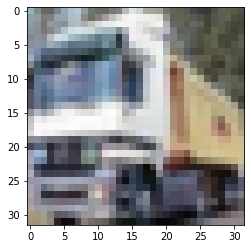

In [46]:
plt.imshow(x[1])

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


In [70]:
import random
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF

class random_hor_flip:
    """
    Randomly flips the image and its corresponding segmentation.
    """

    def __init__(self, prob_flip=0.5):
        self.prob_flip = prob_flip

    def __call__(self, sample):
        """
        sample (tuple or list): A 2 element list or tuple containing the 
                                image and its corresponding segmentation.
        """
        if random.random() < self.prob_flip:
            sample[0] = TF.hflip(sample[0])
            sample[1] = TF.hflip(sample[1])

        return sample

In [105]:
r = random_hor_flip()

im = torch.Tensor(x[1].transpose(2, 0, 1))
f = TF.hflip(im)

In [109]:
f.shape

torch.Size([3, 32, 32])

In [108]:
plt.imshow(f.transpose(1,2,0).type(torch.uint8))

TypeError: transpose() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (name dim0, name dim1)
 * (int dim0, int dim1)


In [75]:
import torchvision
torchvision.__version__

'0.9.0'

In [110]:
a = [1,2,3]

In [111]:
b = [4,5,6]

In [112]:
[1,2,3,*b]

[1, 2, 3, 4, 5, 6]

In [113]:
a = {"a":1, "b":2}

In [116]:
p = ["a", "b"]

a[*p]

SyntaxError: invalid syntax (<ipython-input-116-0a2ec36a9386>, line 3)